In [34]:
import pandas as pd
from utils import get_control_clean
from utils import isc
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.pyplot import figure
import matplotlib.ticker as mtick
mpl.rc('font', family='Liberation Sans')

In [37]:
treated = pd.read_csv('./strata/ii_t_hi_f.csv', index_col=0)
controls = pd.read_csv('./strata/ii_c_hi_f.csv', index_col=0)
controls = controls[~(controls.pidp == 1020477375)]
target_var = 'ind_inc_deflated'
print('Data loaded...')
len(treated.pidp.unique())

Data loaded...


794

In [38]:
samples_fc = get_control_clean(controls, treated, [target_var,
                                 'dvage',
                                 'mastat_recoded',
                                 'asian',
                                 'black',
                                 'mixed',
                                 'other',
                                 'low',
                                 'middle'],
                                   target_var,
                                 'weight_yearx')


In [89]:
df_example = samples_fc[28]['data']
df_example.index = df_example.index.set_names(['var', 'year'])
df_example.to_csv('original_format.csv')


In [91]:
import pickle
with open('data.pkl', 'wb') as file:
    pickle.dump(samples_fc[28], file)

In [90]:
df_example

pidp                      81959733     68008847    68031967    68037407    \
var              year                                                       
ind_inc_deflated 2010.0  1460.674157  1745.495495         0.0    0.000000   
                 2011.0  1300.108342  1438.158227         0.0  441.310928   
                 2012.0     0.000000  1486.344538         0.0  441.523095   
                 2013.0  1027.692308  1333.333333         0.0  440.000000   
                 2014.0   968.718466  1410.642570         0.0  441.644817   
...                              ...          ...         ...         ...   
middle           2014.0     0.000000     0.000000         0.0    0.000000   
                 2015.0     0.000000     0.000000         0.0    0.000000   
                 2016.0     0.000000     0.000000         0.0    0.000000   
                 2017.0     0.000000     0.000000         0.0    0.000000   
                 2018.0     0.000000     0.000000         0.0    0.000000   

pidp                      68041487    68044207    68044887     68045567    \
var              year                                                       
ind_inc_deflated 2010.0  3716.216216  720.720721         0.0  2808.988764   
                 2011.0  3607.800650  758.396533         0.0  2723.311547   
                 2012.0     0.000000  739.176346         0.0  2626.050420   
                 2013.0  3402.061856  769.230769         0.0  2051.282051   
                 2014.0  3360.242180  736.770953         0.0  2219.979818   
...                              ...         ...         ...          ...   
middle           2014.0     0.000000    1.000000         0.0     0.000000   
                 2015.0     0.000000    1.000000         0.0     0.000000   
                 2016.0     0.000000    0.000000         0.0     0.000000   
                 2017.0     0.000000    0.000000         0.0     0.000000   
                 2018.0     0.000000    0.000000         0.0     0.000000   

pidp                      68046927     68051011    ...   1633691851  \
var              year                              ...                
ind_inc_deflated 2010.0  1375.280899  3089.887640  ...  3376.906318   
                 2011.0  1434.452871  3069.696726  ...     0.000000   
                 2012.0  1331.932773  2954.463064  ...  3350.515464   
                 2013.0  1318.974359  2905.979567  ...  3192.207583   
                 2014.0  1348.133199  2617.255248  ...  3360.211772   
...                              ...          ...  ...          ...   
middle           2014.0     0.000000     1.000000  ...     0.000000   
                 2015.0     0.000000     1.000000  ...     0.000000   
                 2016.0     0.000000     1.000000  ...     0.000000   
                 2017.0     0.000000     1.000000  ...     0.000000   
                 2018.0     0.000000     1.000000  ...     0.000000   

pidp                     1633729251  1633876823  1634105967   1634125691  \
var              year                                                      
ind_inc_deflated 2010.0         0.0         0.0         0.0  2723.311547   
                 2011.0         0.0         0.0         0.0  2456.136924   
                 2012.0         0.0         0.0         0.0  1849.948613   
                 2013.0         0.0         0.0         0.0  1680.110931   
                 2014.0         0.0         0.0         0.0  2081.248829   
...                             ...         ...         ...          ...   
middle           2014.0         0.0         0.0         0.0     0.000000   
                 2015.0         0.0         0.0         0.0     0.000000   
                 2016.0         0.0         0.0         0.0     0.000000   
                 2017.0         0.0         0.0         0.0     0.000000   
                 2018.0         0.0         0.0         0.0     0.000000   

pidp                     1634129087  1634234491   1634453451  1634610527  \
var    

In [86]:
melted_df = df_example.reset_index().melt(id_vars=['var', 'year'], var_name='pidp')
melted_df
pivoted_df = melted_df.pivot(index=['year', 'pidp'], columns='var', values='value').reset_index()
pivoted_df =pivoted_df.sort_values(by=['pidp', 'year'])

/tmp/ipykernel_3287/1419346394.py:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pivoted_df = melted_df.pivot(index=['year', 'pidp'], columns='var', values='value').reset_index()


In [87]:
pivoted_df = pivoted_df.reset_index(drop=True)
pivoted_df.columns.name = ''
pivoted_df.to_csv('test_data.csv')

In [17]:
out_fc = isc(samples_fc, 100)
w_diffs_fc = pd.concat(out_fc['weighted_diff'], axis=1).sort_index()

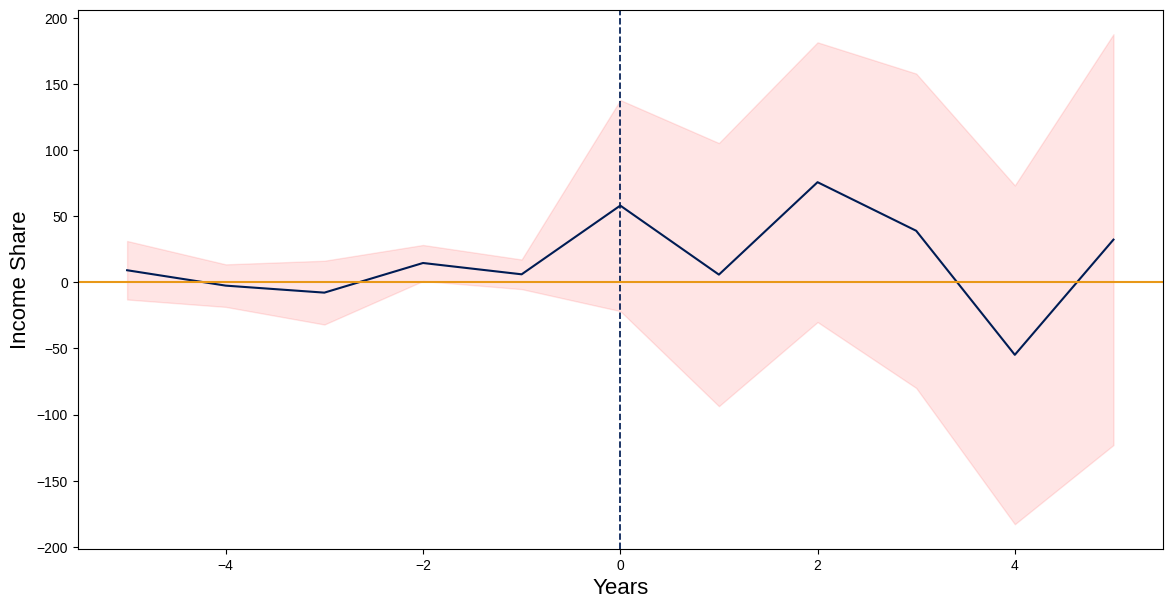

In [18]:
figure(figsize=(14, 7))
differences = w_diffs_fc.copy()
ax = differences.mean(axis=1).plot(color='#001c54')
plt.axvline(x=0, linestyle='--', color='#001c54', alpha=1, linewidth=1.25)
plt.xlabel('Years', fontsize=16)
plt.ylabel('Income Share', fontsize=16)
plt.axhline(y=0, color='#E89818', linestyle='-')
plt.fill_between(x=differences.index,
                 y1=differences.mean(axis=1) + (1.96*(differences.std(axis=1)/differences.count(axis=1).apply(math.sqrt))),
                 y2=differences.mean(axis=1) - (1.96*(differences.std(axis=1)/differences.count(axis=1).apply(math.sqrt))),
                     color='red', alpha=0.1)
#plt.tight_layout()
plt.show()